In [12]:
import pandas as pd
import numpy as np

In [13]:
df=pd.read_csv('/content/Iris.csv')

In [14]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [16]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [22]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
df['Species']=df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

/tmp/ipython-input-23-3770966463.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Species']=df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test= train_test_split(df.drop('Species',axis=1),df['Species'],test_size=0.2,random_state=42)

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
st=StandardScaler()
x_train_transformed=st.fit_transform(x_train)
x_test_transformed=st.transform(x_test
                                )

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
kc=KNeighborsClassifier()
kc.fit(x_train_transformed,y_train)

KNeighborsClassifier()

In [39]:
y_pred=kc.predict(x_test_transformed)

In [48]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay,confusion_matrix
print(accuracy_score(y_test,y_pred))

1.0


Experiment with different k values



K = 1
Accuracy: 1.00

K = 3
Accuracy: 1.00

K = 5
Accuracy: 1.00

K = 7
Accuracy: 1.00


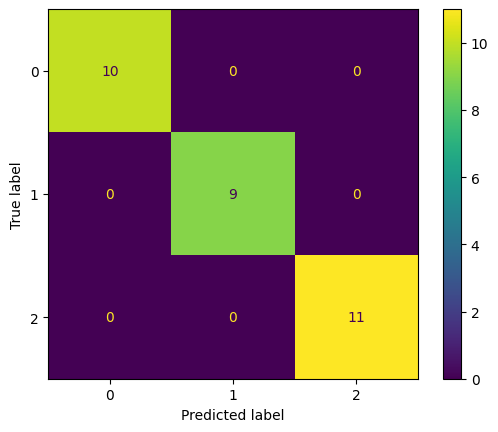

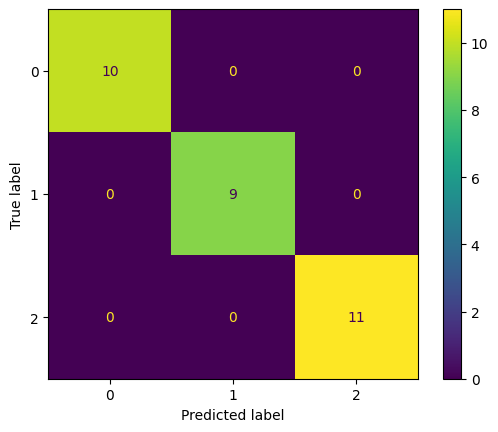

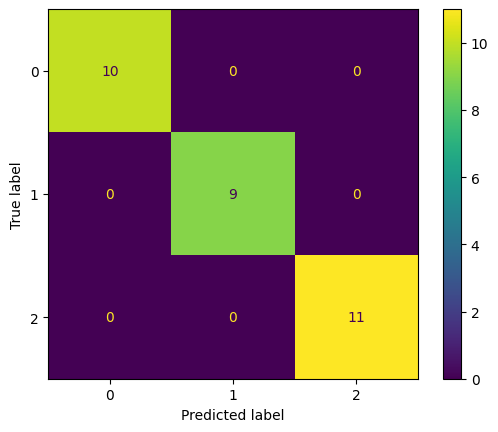

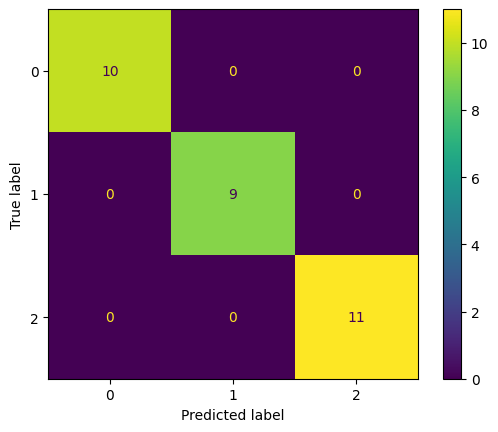

In [50]:
k_values = [1, 3, 5, 7]
for k in k_values:
    print(f"\nK = {k}")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_transformed, y_train)

    y_pred = knn.predict(x_test_transformed)
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.2f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

In [52]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [55]:
x_train_transformed1=x_train_transformed[:,:2]

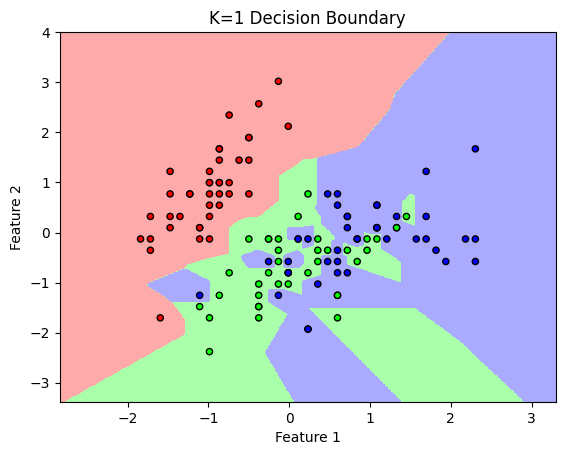

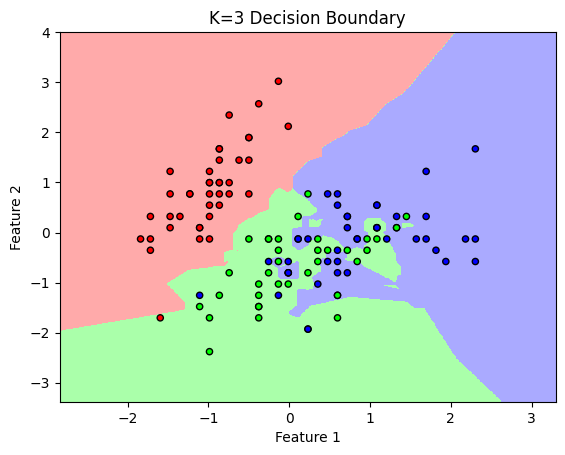

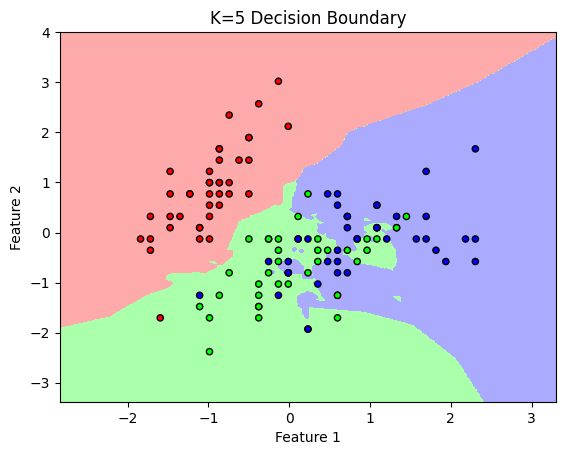

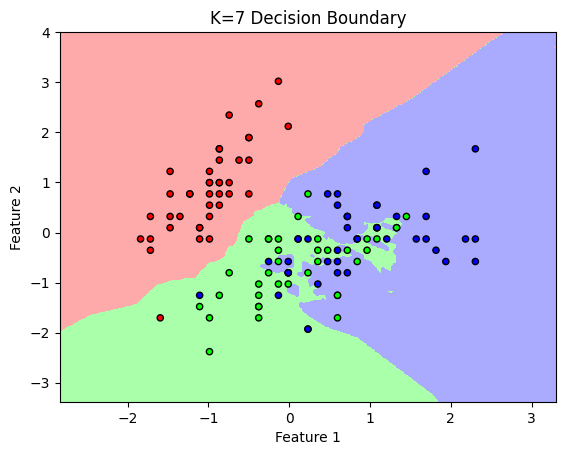

In [59]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_transformed1, y_train)
    h = 0.02  # Mesh step size
    x_min, x_max = x_train_transformed1[:, 0].min() - 1, x_train_transformed1[:, 0].max() + 1
    y_min, y_max = x_train_transformed1[:, 1].min() - 1, x_train_transformed1[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(x_train_transformed1[:, 0], x_train_transformed1[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(f"K={k} Decision Boundary")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

another way to plot

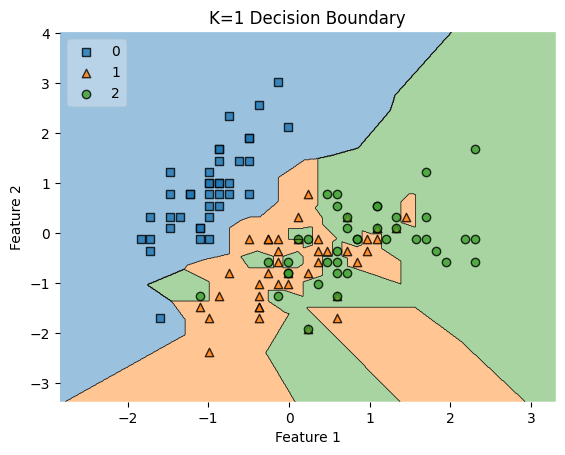

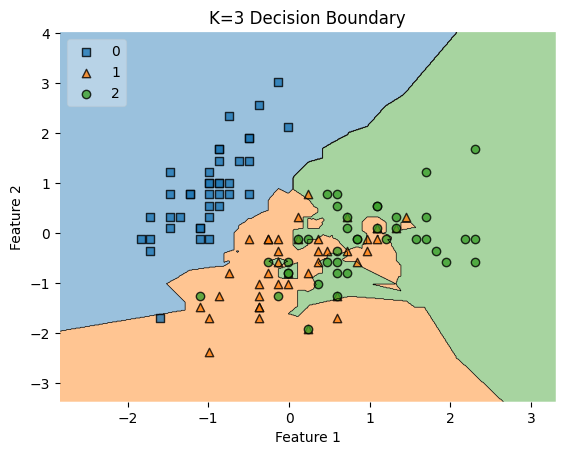

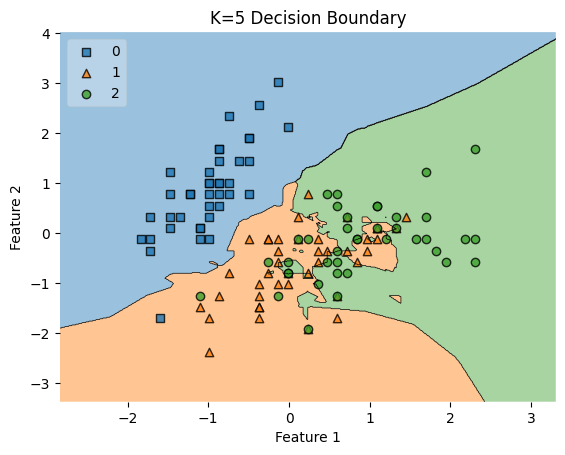

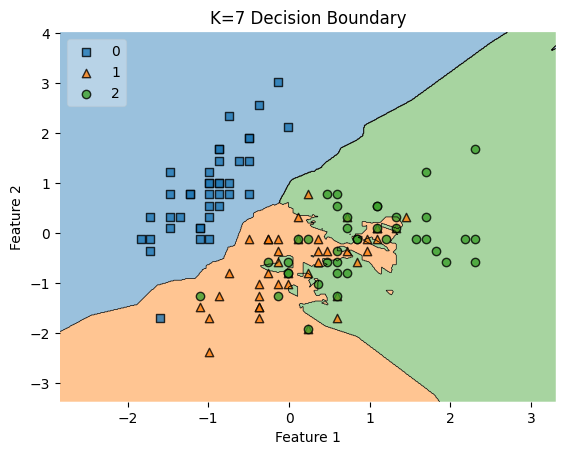

In [61]:
from mlxtend.plotting import plot_decision_regions
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_transformed1, y_train)

    plt.figure()
    plot_decision_regions(X=x_train_transformed1, y=y_train.to_numpy(), clf=knn, legend=2)
    plt.title(f'K={k} Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()